# COMP1032 Coursework (2023-2024) Project Titanic

### Data Analysis

<b>Preliminary</b>: Load the titanic dataset and display some samples of the dataset. Show the full set of attributes of the dataset. [4 marks]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"data-Titanic.xlsx")

print(df.info())

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

<b>Question 1</b>: Are there more passengers in the first class than those in the second class? Plot the comparison using appropriate method to support your answer. [6 marks]

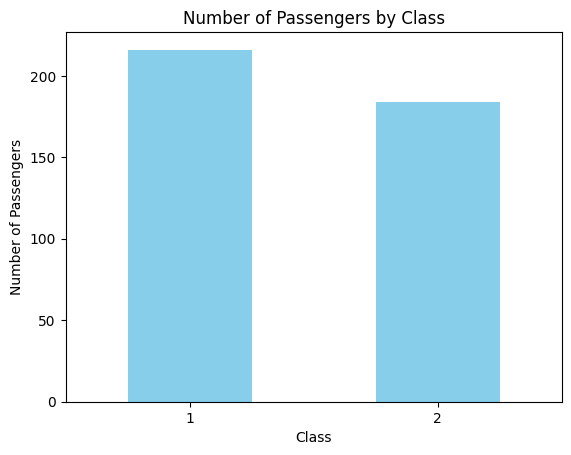

In [ ]:
# Count the number of passengers in each class
class_counts = df[df['Pclass'].isin([1,2])]['Pclass'].value_counts()

# Plot the comparison
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation = 0)
plt.show()


There are more people in first class than in second class.

<b>Question 2</b>: What's the survival rate for male and female passengers? [6 marks]

Survivor rate by sex:
Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64


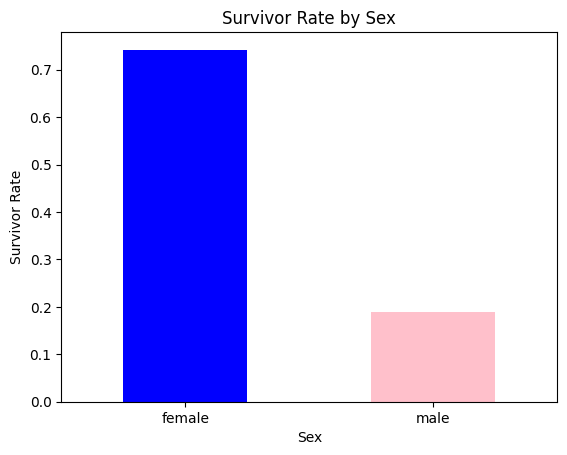

In [ ]:
# Calculate survivor rate for male and female passengers
survivor_rate_by_sex = df.groupby('Gender')['Survived'].mean()

# Display survivor rate
print("Survivor rate by sex:")
print(survivor_rate_by_sex)


# Plot survivor rate by sex
survivor_rate_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survivor Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survivor Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels 
plt.show()


<b>Question 3</b>: Show the survival numbers of male and female passengers, respectively. [6 marks]

Number of male and female survivors:
Gender
female    233
male      109
Name: count, dtype: int64


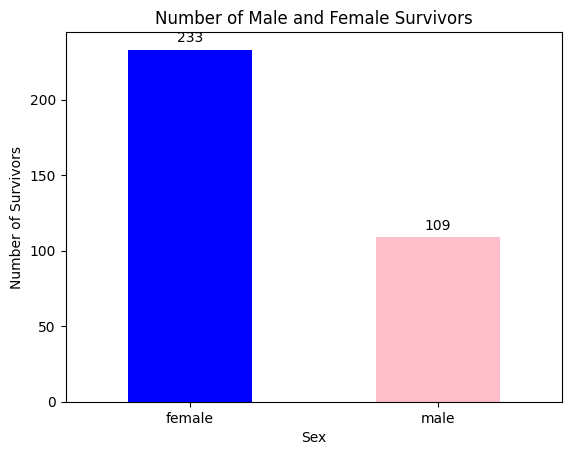

In [ ]:
# Filter the DataFrame to include only survivors
survivors = df[df['Survived'] == 1]

# Count the number of male and female survivors
survivors_by_sex = survivors['Gender'].value_counts()

# Display the number of male and female survivors
print("Number of male and female survivors:")
print(survivors_by_sex)

# Plot the number of male and female survivors
ax = survivors_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male and Female Survivors')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed


# Add labels on top of the bars
for i, v in enumerate(survivors_by_sex):
    ax.text(i, v + 3, str(v), ha='center', va='bottom')


<b>Question 4</b>: What's the survival rates for male and female passengers in different classes, respectively? [8 marks]

In [ ]:
# Calculate survival rates for male and female passengers in different classes
survival_rates = df.groupby(['Gender', 'Pclass'])['Survived'].mean()

# Display survival rates
print("Survival rates for male and female passengers in different classes:")
print(survival_rates)


Survival rates for male and female passengers in different classes:
Gender  Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


<b>Question 5</b>: Did more female passengers die in class 3 than class 2? Explain the plot which supports the answer. [6 marks]

Yes more female passenger died in class 3 compared to class 2 as the bar chart of survival rates for female passenger in different classes indicate a hight rate as compared to class 3 for women passenger which had survived.

Survival rates for female passengers in different classes:
Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64


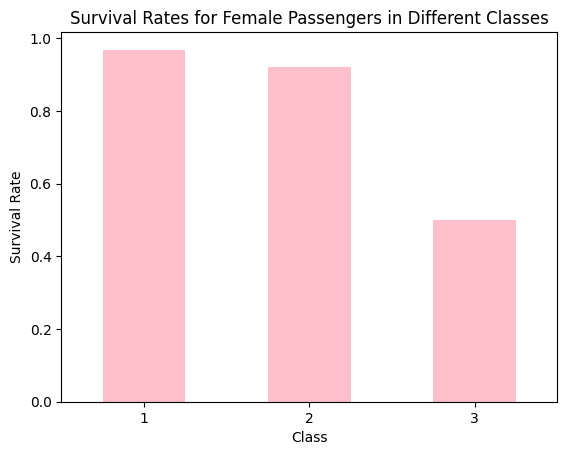

In [ ]:
# Filter the DataFrame to include only female passengers
female_passengers = df[df['Gender'] == 'female']

# Calculate survival rates for female passengers in different classes
female_survival_rates = female_passengers.groupby('Pclass')['Survived'].mean()

# Display survival rates
print("Survival rates for female passengers in different classes:")
print(female_survival_rates)

# Plot the survival rates for female passengers in different classes
female_survival_rates.plot(kind='bar', color='pink')
plt.title('Survival Rates for Female Passengers in Different Classes')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels 
plt.show()

<b>Question 6</b>: Plot the number of male passengers died in higher class (i.e. 1 & 2) and in lower class (i.e. 3). Did more male passengers die in higher classes than in lower class? [8 marks]

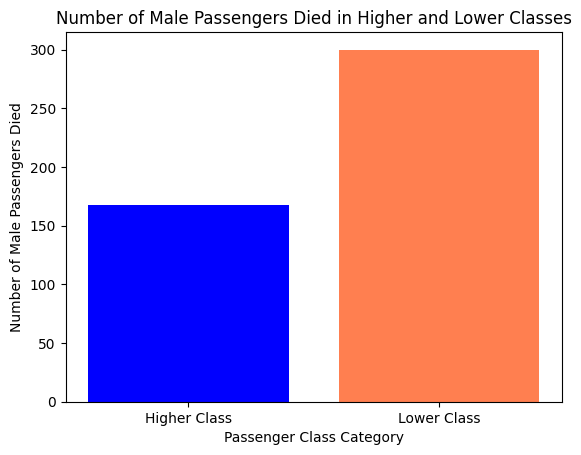

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset to include only male passengers who died
male_passengers_died = df[(df['Gender'] == 'male') & (df['Survived'] == 0)].copy()  # Make a copy to avoid chained assignment

# Create a new column 'Class Category' to represent higher and lower classes
male_passengers_died.loc[:, 'Class Category'] = 'Higher Class'
male_passengers_died.loc[male_passengers_died['Pclass'] == 3, 'Class Category'] = 'Lower Class'

# Group by the new 'Class Category' column and count the number of male passengers who died in each category
counts_by_class_category = male_passengers_died.groupby('Class Category').size()

# Plot the counts for higher class and lower class
plt.bar(counts_by_class_category.index, counts_by_class_category.values, color=['blue', 'coral'])
plt.xlabel('Passenger Class Category')
plt.ylabel('Number of Male Passengers Died')
plt.title('Number of Male Passengers Died in Higher and Lower Classes')
plt.show()


### Data pre-processing <a class="anchor" id="second-bullet"></a>

<b>Question 7</b>: What are the issues with this dataset? What should be done before the data can be used to build machine learning models? [6 marks]

1.Missing Values: Check for missing values in columns such as 'Age', 'Embarked', etc. Missing values can affect the performance of machine learning      models, and appropriate strategies such as imputation or removal of missing data should be applied. Missing values can be replaced with estimated values or rows/columns with missing values can be removed, depending on the amount of missing data and its importance to the analysis.

2.Data Imbalance: Check if there's any class imbalance issue, particularly with the target variable 'Survived'. If one class is significantly more frequent than the other, it might bias the model's predictions. Techniques like oversampling, undersampling, or using class weights can address this.

3.Outliers: Check for outliers in the dataset such as age and fare that may skew the analysis or model predictions. Outliers can be identified using statistical methods or visual inspection and can be handled by removing them or transforming the data.

Below we have opted to remove the entire column of cabin as more than 80% of the data are missing. Also, we have replaced the missing value of age with the mean age due to its smaller missing value. Furthermore, we also replaced the missing embarked value with the mode.

In [ ]:
# Load the dataset
df = pd.read_excel('data-Titanic.xlsx')  # Replace 'data-Titanic.xlsx' with your dataset file path

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)


# Drop 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Impute missing values in 'Age' column with mean age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

# Impute missing values in 'Embarked' column with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)



# Check again for missing data after handling
missing_data_after_handling = df.isnull().sum()
print("\nMissing Data After Handling:")
print(missing_data_after_handling)

Missing Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Data After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Decision Tree

<b>Question 8</b>: Explain how a decisoion tree of depth 3 can be trained and evaluated. How accurate the decision tree model can classify a given passenger? [10 marks]

Data Preparation:
Load the dataset: Load the dataset containing features (independent variables) and the target variable (dependent variable).
Separate features and target: Split the dataset into features (X) and the target variable (y), where X contains columns 'Age', 'Gender', and 'Pclass', and y contains the 'Survived' column.

Feature Encoding:
Convert categorical variables: Siice the 'Gender' column contains string values ('female' and 'male'), we convert them to numerical format using mapping or encoding techniques. For example, map 'female' to 0 and 'male' to 1.

Train-Test Split:
Split the dataset: Split the data into training and testing sets using the train_test_split function from scikit-learn. Typically, you might use 70% of the data for training and 30% for testing.

Model Training:
Initialize the decision tree classifier: Create an instance of the DecisionTreeClassifier class with a maximum depth of 3.
Train the classifier: Fit the decision tree classifier to the training data (X_train and y_train) using the fit method.

Model Evaluation:
Predict on the test set: Use the trained classifier to make predictions on the test data (X_test) using the predict method.
Evaluate accuracy: Compare the predicted labels (y_pred) with the actual labels (y_test) from the test set and calculate the accuracy score using the accuracy_score function from scikit-learn.

Accuracy:
Regarding accuracy, the calculated accuracy score represents the proportion of correctly classified instances (survived or not survived) out of the total instances in the test set. The accuracy score indicates how well the decision tree model can classify a given passenger as a survivor or non-survivor based on their features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# X contains features and y contains the target variable
X = df[['Age', 'Gender', 'Pclass']]  # Features: Age, Sex, Pclass 
y = df['Survived']  # Target variable: Survived

# Convert 'Gender' column to numerical format
Gender_mapping = {'female': 0, 'male': 1}
X['Gender'] = X['Gender'].replace(Gender_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# Train the decision tree classifier with depth 3
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dt_model.predict(X_train)

# Calculate training accuracy
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = dt_model.predict(X_test)

# Calculate test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8186195826645265
Test Accuracy: 0.7947761194029851


C:\Users\junch\AppData\Local\Temp\ipykernel_163460\2314812582.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Gender'] = X['Gender'].replace(Gender_mapping)
C:\Users\junch\AppData\Local\Temp\ipykernel_163460\2314812582.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].replace(Gender_mapping)


<b>Question 9</b>: What's the best depth to build a decision tree classification model for the Titanic data? How accurate is the best decision tree? [10 marks]

best_depth accuracy tells you how well the model performs on average during cross-validation with the selected depth, accuracy tells you how well the model performs specifically on the test data.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Define depths to evaluate
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Perform cross-validation for each depth
cv_scores = []
for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print (cv_scores)


# Find the best depth
best_depth = depths[cv_scores.index(max(cv_scores))]


# Print accuracy of best depth
print("Best depth: ", best_depth)
print("Best depth accuracy:", max(cv_scores))

# Train the decision tree classifier with the best depth
dt_model = DecisionTreeClassifier(max_depth=best_depth)
dt_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[0.7929339477726575, 0.8025857654889913, 0.8088837685611878, 0.8136968766001024, 0.8040962621607782, 0.8008704557091655, 0.8057603686635945, 0.8089349718381976, 0.8105222734254992, 0.816973886328725]
Best depth:  10
Best depth accuracy: 0.816973886328725
Accuracy: 0.7686567164179104


### Neural Networks

<b>Question 10</b>: How accurate a neural network can classify a given passenger? [10 marks]

In [ ]:
from sklearn.neural_network import MLPClassifier


# Train the neural network model
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=3000)
mlp_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = mlp_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = mlp_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.6340288924558587
Test Accuracy: 0.5746268656716418


<b>Question 11</b>: Where are the errors (inaccuracy) incurred with the neural network, i.e. classifying survived or died passengers? [10 marks]

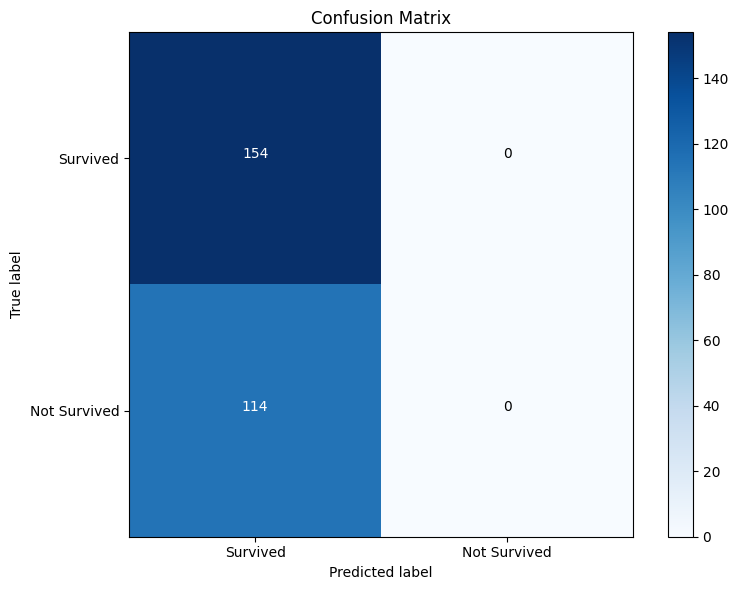

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Survived', 'Not Survived'])
plt.yticks(tick_marks, ['Survived', 'Not Survived'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


<b>Question 12</b>: Which of the decision tree and neural network model is better in terms of the overall accuracy? [10 marks]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Predict on the test set using decision tree model
y_pred_dt = dt_model.predict(X_test)

# Predict on the test set using neural network model
y_pred_mlp = mlp_model.predict(X_test)

# Calculate accuracy for decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate accuracy for neural network model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Neural Network Model Accuracy:", accuracy_mlp)

# Compare the accuracy scores and determine which model is better
if accuracy_dt > accuracy_mlp:
    print("Decision Tree Model is better.")
elif accuracy_mlp > accuracy_dt:
    print("Neural Network Model is better.")
else:
    print("Both models have the same accuracy.")


Decision Tree Model Accuracy: 0.7873134328358209
Neural Network Model Accuracy: 0.7835820895522388
Decision Tree Model is better.
